#### DSC540 <br> Michael Hotaling <br> Weeks 3 & 4 <br> 2020-12-04

## Activity 5: Generating Statistics from a CSV File
Suppose you are working with the famous Boston housing price (from 1960) dataset. This dataset is famous in the machine learning community. Many regression problems can be formulated, and machine learning algorithms can be run on this dataset. You will perform a basic data wrangling activity (including plotting some trends) on this dataset by reading it as a pandas DataFrame.

1. **Load the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. **Read in the Boston housing dataset (given as .csv file) from the local directory.**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.columns = df.columns.str.upper()

3. **Check the first 10 records. Find the total number of records**

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
len(df)

506

4. **Create a smaller DataFrame with columns that do not include `CHAS`, `NOX`, `B`, and `LSTAT`.**

In [5]:
df2 = df.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis = 1).copy()
df2.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2


5. **Check the last seven records of the new DataFrame you just created.**

In [6]:
df2.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


6. **Plot the histogram of all the variables (columns) in the new DataFrame.**

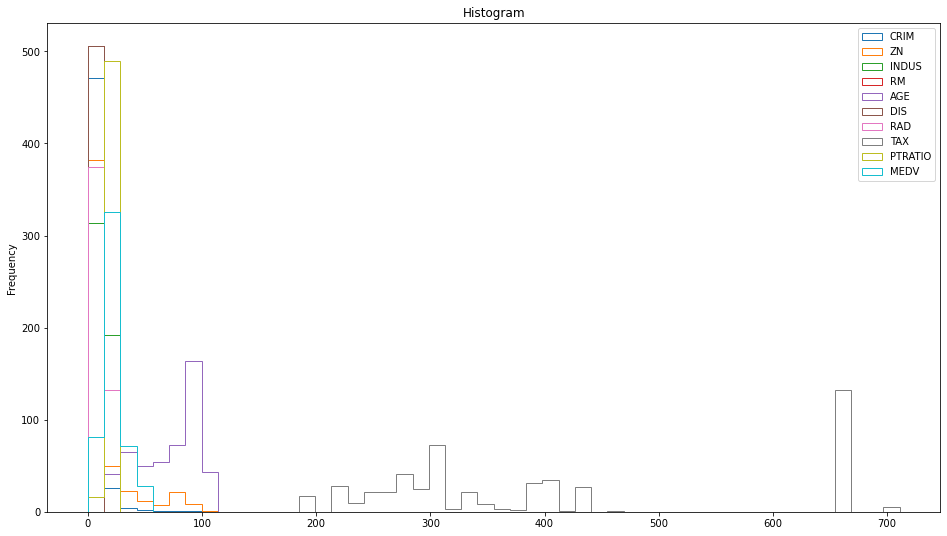

In [7]:
df2.plot.hist(bins = 50, histtype = "step", figsize=(16,9));
plt.title("Histogram")
plt.show()

7. **Plot them all at once using a `for` loop. Try to add a unique title to a plot.**

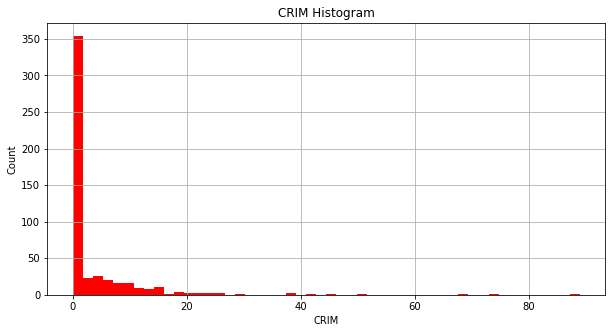

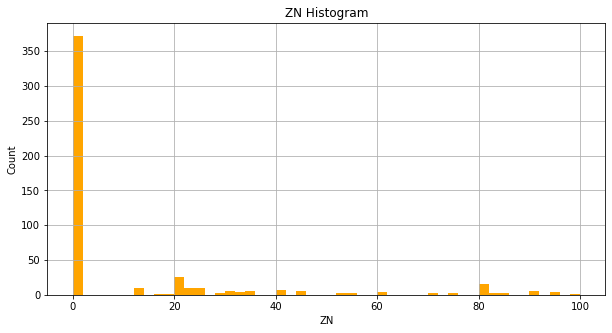

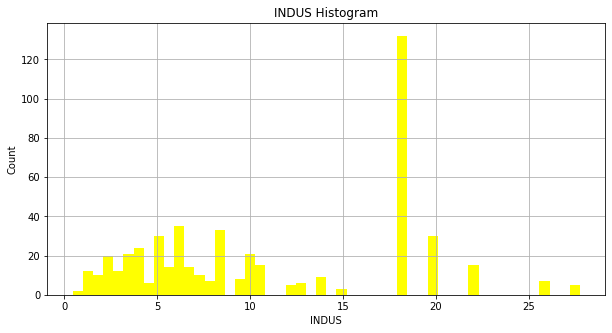

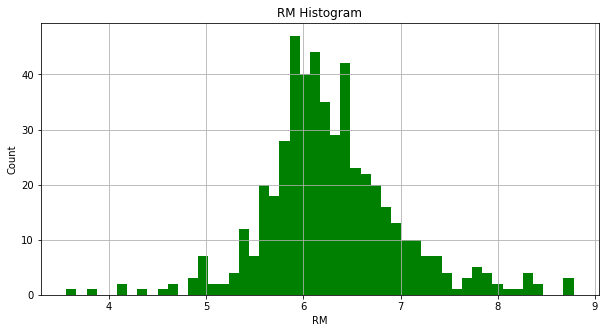

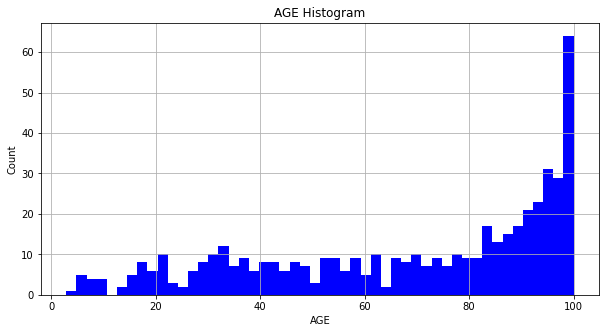

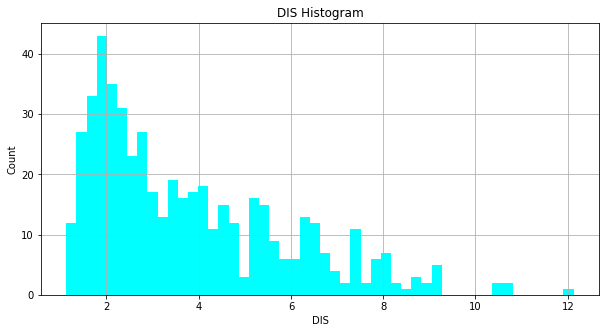

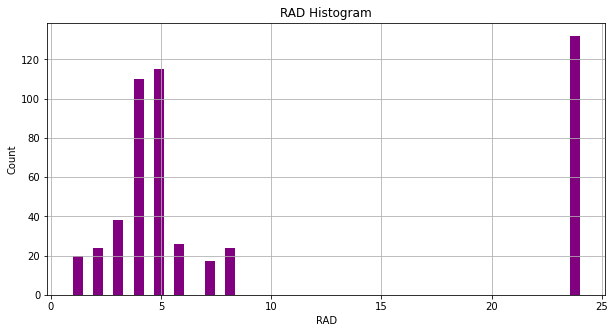

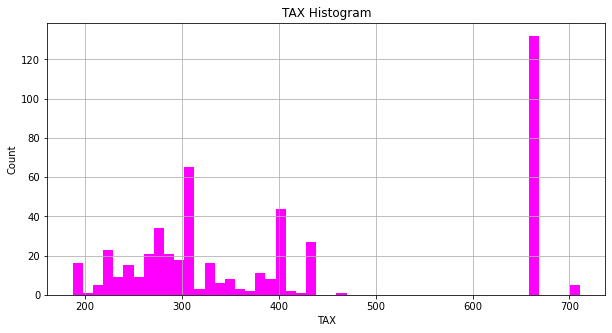

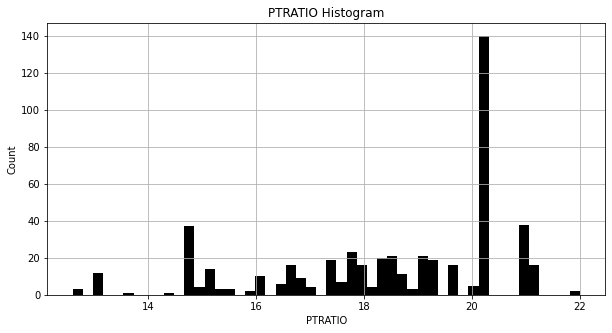

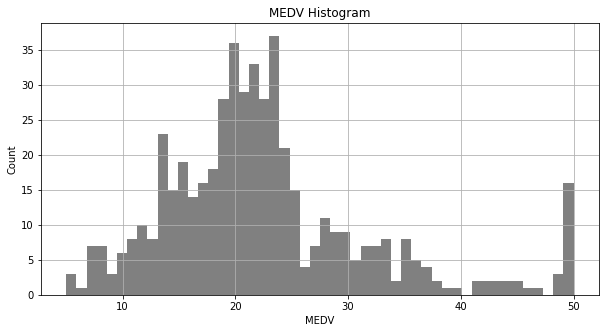

In [8]:
for ind, i in enumerate(df2.columns):
    color = ["red","orange","yellow","green","blue","cyan","purple","magenta","black","grey"][ind]
    plt.figure(figsize = (10,5))
    plt.hist(df2[i], bins = 50, color = color)
    plt.title(i.upper()+" Histogram")
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

8. **Create a scatter plot of crime rate versus price.**

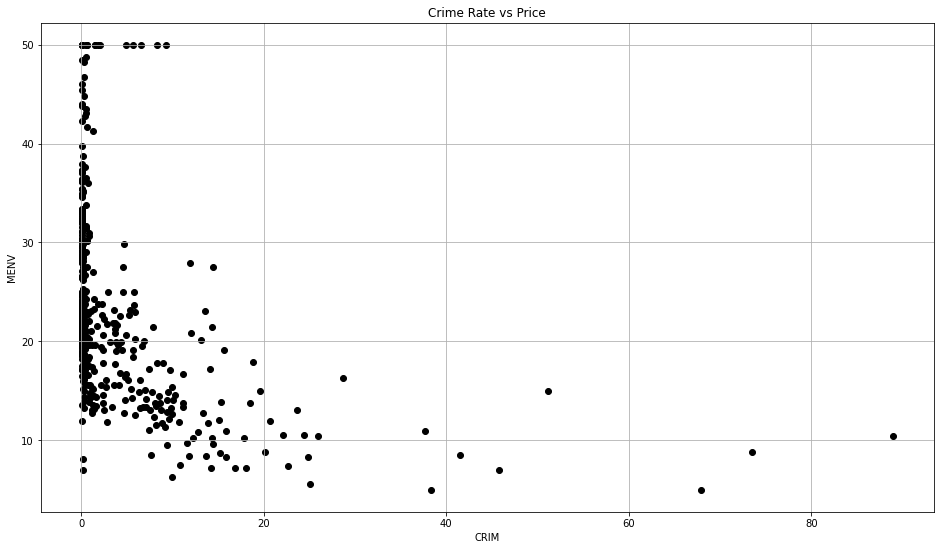

In [9]:
plt.figure(figsize = (16,9))
plt.scatter(df2['CRIM'], df2['MEDV'], color = "black")
plt.title("Crime Rate vs Price")
plt.xlabel("CRIM")
plt.ylabel("MENV")
plt.grid(True)
plt.show()

9. **Plot using `log10(crime)` verses price.**

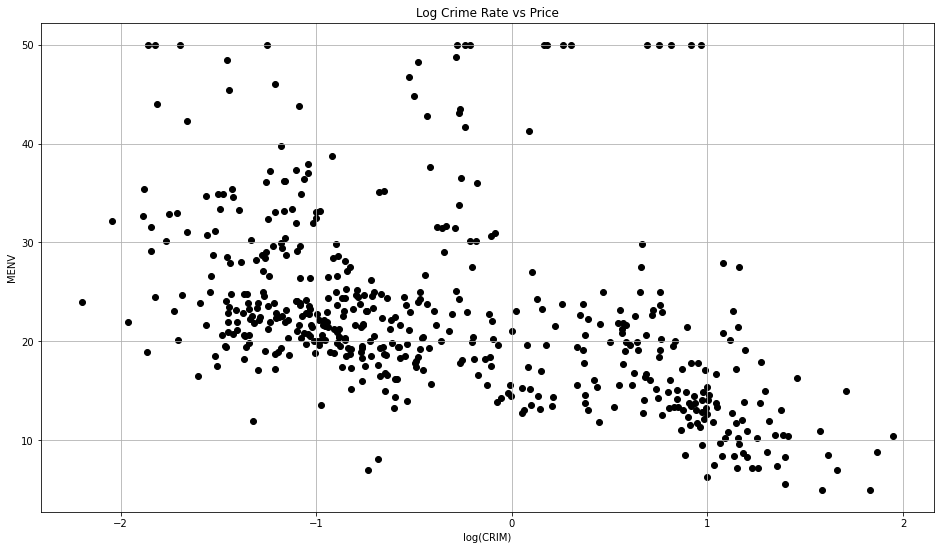

In [10]:
plt.figure(figsize = (16,9))
plt.scatter(np.log10(df2['CRIM']), df2['MEDV'], color = "black")
plt.title("Log Crime Rate vs Price")
plt.xlabel("log(CRIM)")
plt.ylabel("MENV")
plt.grid(True)
plt.show()

10. **Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distance to five Boston employment centers, and the percentage of houses with a low price (<$20,000)**

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [11]:
mean_rooms = np.mean(df2['RM'])
print("Mean rooms per dwelling: {:.2f}".format(mean_rooms))

Mean rooms per dwelling: 6.28


In [12]:
median_age = np.median(df2['AGE'])
print("Median age: {:.1f}".format(median_age))

Median age: 77.5


In [13]:
mean_distance = np.mean(df2['DIS'])
print("Mean distance to five Boston unemployment centers: {:.2f}".format(mean_distance))

Mean distance to five Boston unemployment centers: 3.80


In [14]:
houses_under_20 = len(df2[df2['MEDV'] <20]) / len(df2)
print("Percentage of houses with a low price (<$20,000): {:.2f}%".format(houses_under_20 * 100))

Percentage of houses with a low price (<$20,000): 41.50%


## Activity 6: Working with the Adult Income Dataset (UCI)
In this activity, you will work with the Adult Income Dataset from the UCI machine learning portal. The Adult Income dataset has been use in many machine learning papers that address classification problems. You will read the data from a CSV file into a pandas DataFrame and do some practice on the advanced data wrangling you learned about in this chapter. 

THe aim of this activity is to practice various abvdanced pandas DataFrame operations, for example, for subsetting, applying user-defined functions, summary statistics, visualizations, boolean indexing, group by, and outlier detection on a real-life dataset. We have the data downloaded as CSV file on the disk for your case. However, it is recommended to practice data downloading on your own so that you are familiar with the process. 

Here is the URL for the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Here is the URL for the description of the dataset and the variables: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

These are the steps that will help you solve this activity.

1. **Load the necessary libraries**

In [15]:
import pandas as pd
import numpy as np

2. **Read the audlt income dataset from the following URL: https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Chapter04/Activity06/adult_income_data.csv**

In [16]:
df = pd.read_csv("adult_income_data.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


3. **Create a script that will read a text file line by line.**

In [17]:
col_names = []
with open('adult_names.txt',"r") as f:
    for line in f:
        line = line.replace("\n", " ")
        x = line.split(": ")[0]
        if x != " ":
            col_names.append(x)
print(col_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


4. **Add a name of `Income` for the response variable to the dataset.**

In [18]:
col_names.append("Income")

In [19]:
df = pd.read_csv("adult_income_data.csv", names=col_names, na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


5. **Find the missing values**

In [20]:
df1 = df[df.isna().any(axis=1)]
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Female,0,0,32,United-States,<=50K


6. **Create a DataFrame with only age, education, and occupation by using subsetting.**

In [21]:
df2 = df.loc[[i for i in range(len(df))],['age','education','occupation']]

In [22]:
df2

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


7. **Plot a histogram of age with a bin size of 20**

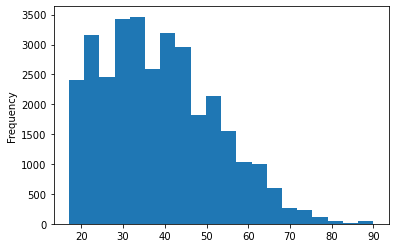

In [23]:
df['age'].plot.hist(bins = 20);

8. **Create a fiunction to strip whitespace characters.**

In [24]:
def stripper(x):
    '''Removes whitespaces from a string'''
    return str(x).strip()

In [25]:
stripper("           hello            ")

'hello'

9. **Use the `apply` method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column**

In [26]:
df2['education_clean'] = df2['education'].apply(stripper)
df2['occupation_clean'] = df2['occupation'].apply(stripper)

df2['education'] = df2['education_clean']
df2['occupation'] = df2['occupation_clean']

df2 = df2.drop(labels=['education_clean', 'occupation_clean'], axis = 1)
df2

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


10. **Find the numer of people who are aged between 30 ad 50**

In [27]:
df3 = df2[(df2['age'] >= 30) & (df2['age'] <= 50)]

In [28]:
len(df3)

16390

# WHAT?

11. **Group the records based on age and education to find how the mean age is distributed.**

In [29]:
round(np.mean(df3['age']))

39

In [30]:
df4 = df3.groupby(['education','age']).describe()

In [31]:
df4

occupation                               
                      count unique                top freq
education    age                                          
10th         30          13      7       Craft-repair    4
             31          19     10   Transport-moving    3
             32          22      7       Craft-repair   10
             33          23      8  Handlers-cleaners    5
             34          14      6      Other-service    6
...                     ...    ...                ...  ...
Some-college 46         141     13    Exec-managerial   26
             47         141     13       Adm-clerical   28
             48         105     13    Exec-managerial   20
             49         114     13    Exec-managerial   26
             50         100     13       Craft-repair   19

[327 rows x 4 columns]

12. **Group by occupation and show the summary statistic of age.**

In [32]:
df5 = df2.groupby("occupation").describe()['age']
df5

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0
Priv-house-serv,149.0,41.724832,18.633688,17.0,24.0,40.0,57.0,81.0


**Find which profession has the oldest workers on average and which profession has the largest share of the workforce above the 75th percentile.**

In [33]:
df5[df5['mean'] == max(df5['mean'])]

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0


In [34]:
df6 = df2[df2['age'] > np.percentile(df2['age'],75)].groupby("occupation").describe()['age']
df6[df6['count'] == max(df6['count'])]

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Exec-managerial,1165.0,56.944206,7.470295,49.0,51.0,55.0,60.0,90.0


13. **Use subplot and groupby to find outliers.**

In [35]:
df5 = df2.groupby("occupation").describe()['age']
df5

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0
Priv-house-serv,149.0,41.724832,18.633688,17.0,24.0,40.0,57.0,81.0


14. **Plot the values on a bar chart**

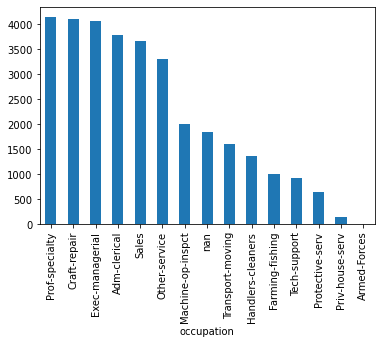

In [36]:
df5['count'].sort_values(ascending=False).plot(kind="bar");

# WHAT

15. **Merge the data using common keys**

## Exercise 3
Create a series and practice basic arithmetic steps

a. **Series 1 = 7.3, -2.5, 3.4, 1.5  with  Index = ‘a’, ‘c’, ‘d’, ‘e’**


In [37]:
ser1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a','b','c','d'])

In [38]:
ser1

a    7.3
b   -2.5
c    3.4
d    1.5
dtype: float64

b. **Series 2 = -2.1, 3.6, -1.5, 4, 3.1 with Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’**

In [39]:
ser2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a','c','e','f','g'])

In [40]:
ser2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

c. **Add Series 1 and Series 2 together and print the results**

In [41]:
ser1 + ser2

a    5.2
b    NaN
c    7.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64


d. **Subtract Series 1 from Series 2 and print the results**

In [42]:
ser2-ser1

a   -9.4
b    NaN
c    0.2
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64